In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,PowerTransformer
pt = PowerTransformer()
sc=StandardScaler()
demo = pd.read_csv("shopping_data.csv")
demo= demo.drop('CustomerID',axis=1)
demo= demo.drop('Genre',axis=1)
demo= demo.drop('Age',axis=1)
feature_names = demo.columns
demo = pd.DataFrame(pt.fit_transform(demo))
demo.columns = feature_names
demo.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.989930,-0.385308
1,-1.989930,1.164467
2,-1.930366,-1.820424
3,-1.930366,1.023549
4,-1.872032,-0.346103


In [2]:
demo.shape

(200, 2)

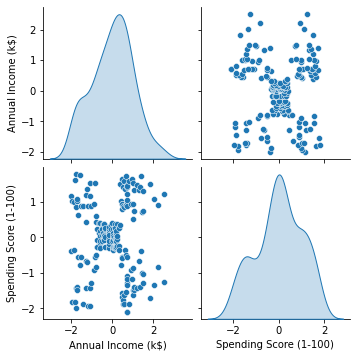

In [3]:
sns.pairplot(demo,diag_kind='kde')

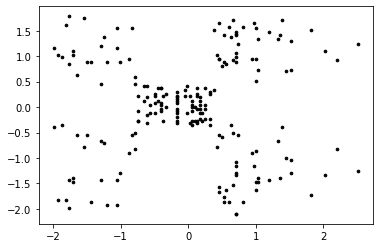

In [4]:
# Getting the values and plotting it
f1 = demo['Annual Income (k$)'].values
f2 = demo['Spending Score (1-100)'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [5]:
from sklearn.cluster import KMeans
# Let us check optimal number of clusters-
cluster_range = range( 1, 20)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5,max_iter=100)
  clusters.fit(X)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,400.000000
1,2,267.038078
2,3,164.131751
3,4,108.743952
4,5,61.264301
5,6,52.284485
6,7,45.047825
7,8,37.691938
8,9,35.925256
9,10,28.552783


In [6]:
errors = clusters_df['cluster_errors']

In [7]:
for i in range(8):
    print(errors[i+1]-errors[i])

-132.96192244502214
-102.90632626327007
-55.387799367154315
-47.47965077862677
-8.979815966882313
-7.236659698387065
-7.355887758787063
-1.7666812766480717


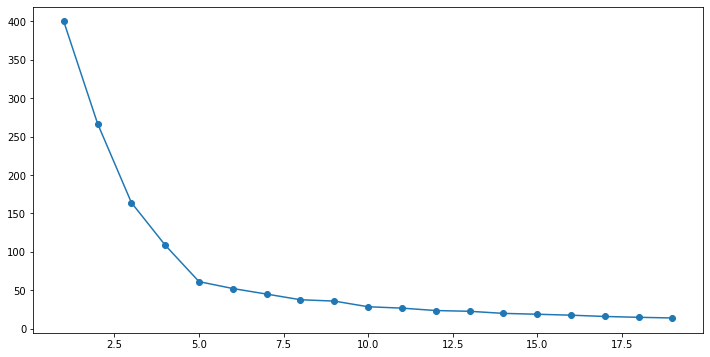

In [8]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [9]:
# Number of clusters
kmeans = KMeans(n_clusters=5)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print("Centroid values")
print("sklearn")
print(centroids) # From sci-kit learn

Centroid values
sklearn
[[-1.42201891  1.10336508]
 [ 1.02744075 -1.31331302]
 [ 0.97265491  1.20116211]
 [-0.14644306  0.00453909]
 [-1.45022752 -1.21572107]]


In [10]:
colnames = ["Annual Income (k$)", "Spending Score (1-100)"]
prediction= kmeans.predict(X)
#X["clusters"] = prediction
X_df = pd.DataFrame(X, columns= colnames)
X_df["group"] = prediction

In [11]:
X_df.head()

,Annual Income (k$),Spending Score (1-100),group
0,-1.989930,-0.385308,4
1,-1.989930,1.164467,0
2,-1.930366,-1.820424,4
3,-1.930366,1.023549,0
4,-1.872032,-0.346103,4


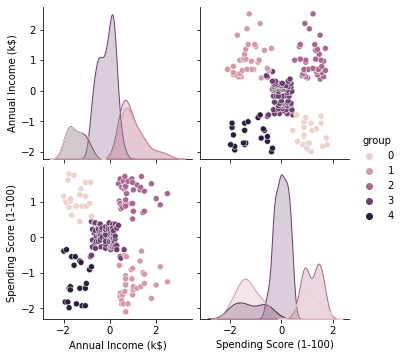

In [12]:
sns.pairplot(X_df,diag_kind='kde',hue='group')

<AxesSubplot:xlabel='group', ylabel='Annual Income (k$)'>

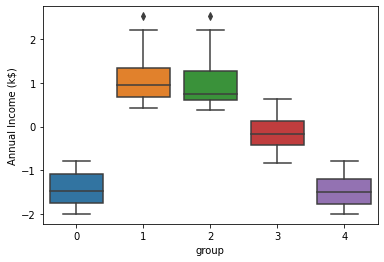

In [13]:
sns.boxplot(x='group',y='Annual Income (k$)',data=X_df)

<AxesSubplot:xlabel='group', ylabel='Spending Score (1-100)'>

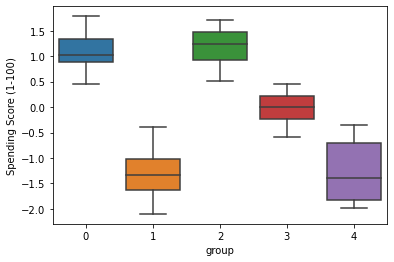

In [14]:
sns.boxplot(x='group',y='Spending Score (1-100)',data=X_df)

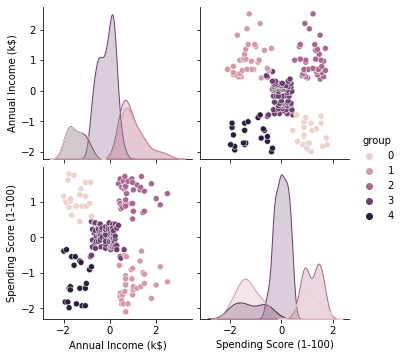

In [15]:
sns.pairplot(X_df,diag_kind='kde',hue='group')

In [16]:
for i in cluster_range:
    points = np.array(X_df.loc[X_df['group'] == i])
    
points

array([], shape=(0, 3), dtype=float64)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

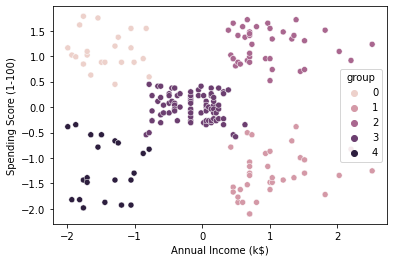

In [17]:
sns.scatterplot(x=X_df['Annual Income (k$)'],y=X_df['Spending Score (1-100)'],hue=X_df['group'])

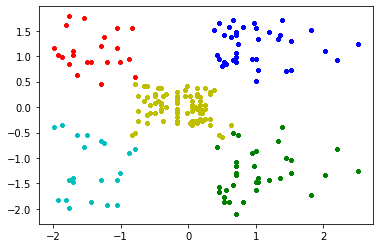

In [18]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
c = np.array([3,3])

for i in labels:
        points = np.array(X_df.loc[X_df['group'] == i])
        #c[i] = np.mean(points, axis=0)
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.30524134048596985


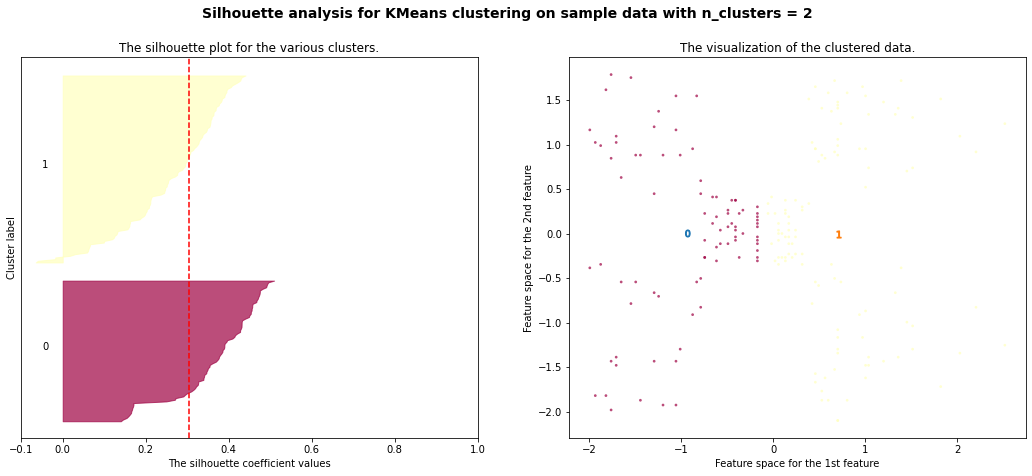

For n_clusters = 3 The average silhouette_score is : 0.44897807908120924


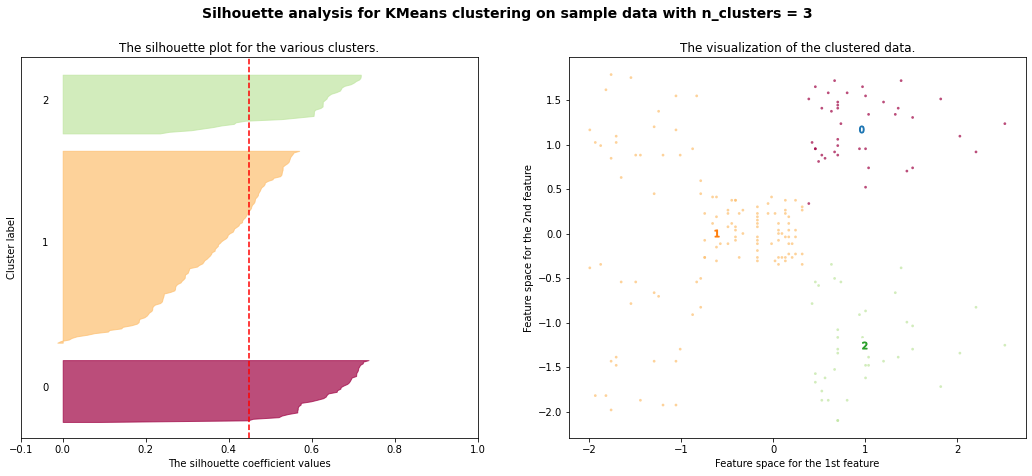

For n_clusters = 4 The average silhouette_score is : 0.4983534404682616


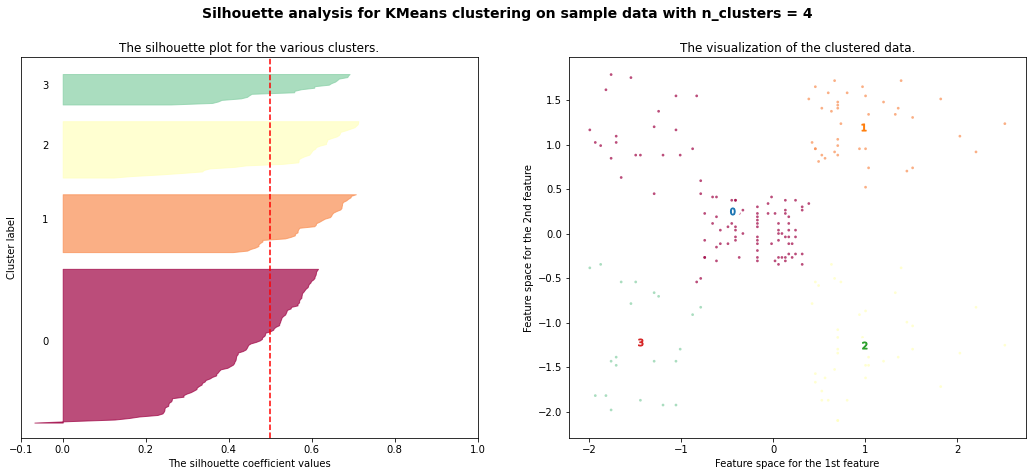

For n_clusters = 5 The average silhouette_score is : 0.5616851362986932


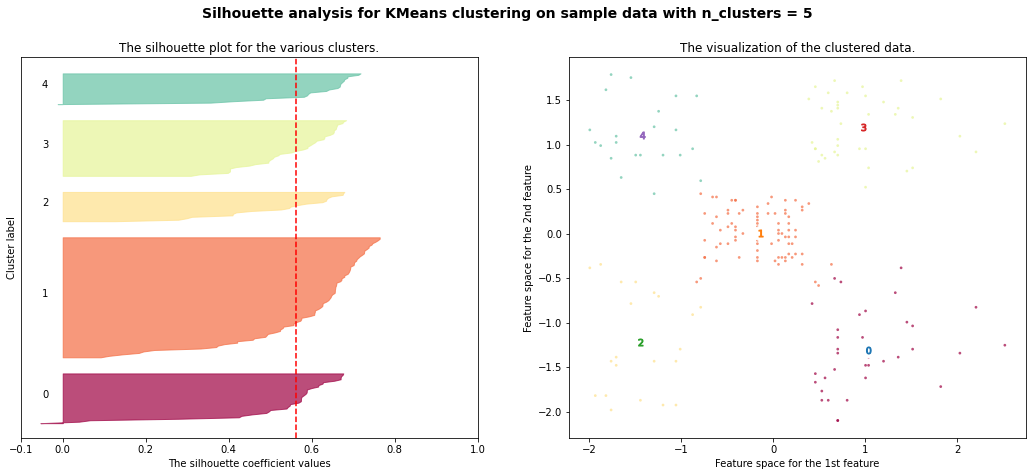

For n_clusters = 6 The average silhouette_score is : 0.4651098982552434


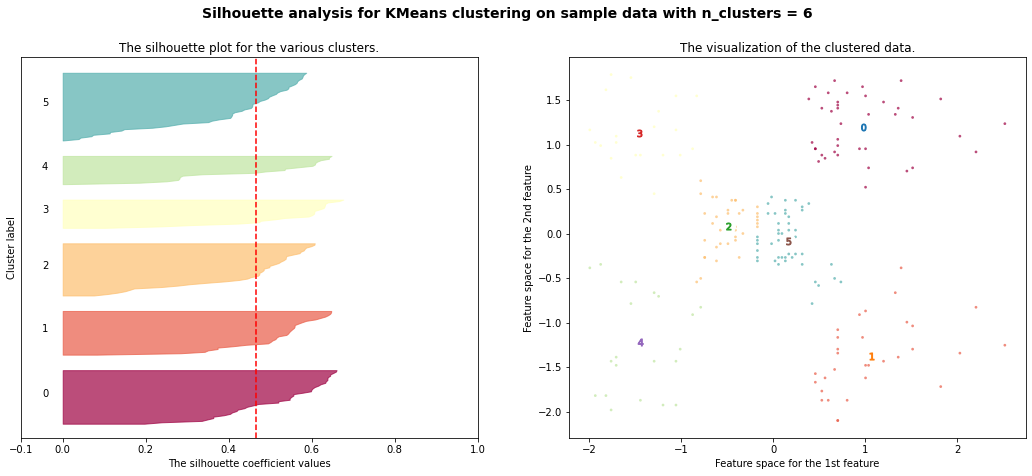

For n_clusters = 7 The average silhouette_score is : 0.4539919205886024


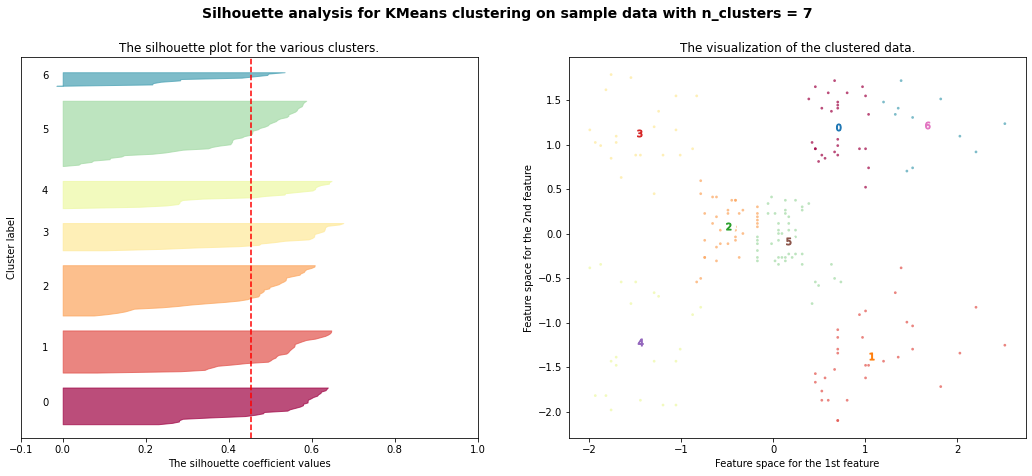

For n_clusters = 8 The average silhouette_score is : 0.4432035455042332


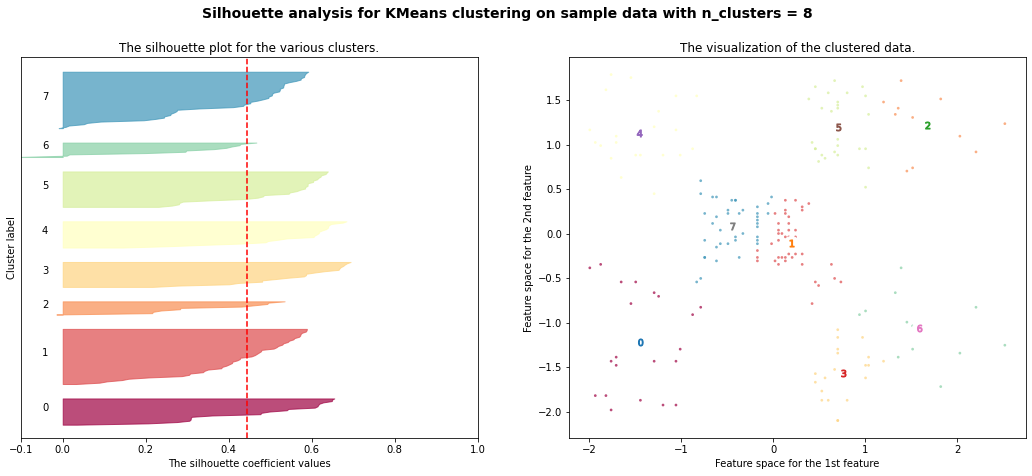

For n_clusters = 9 The average silhouette_score is : 0.44557787958420936


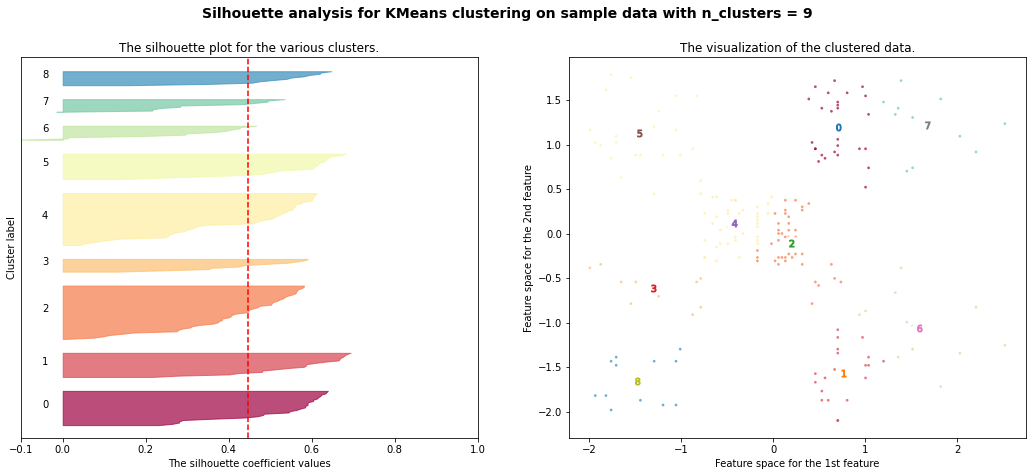

For n_clusters = 10 The average silhouette_score is : 0.4532526798094983


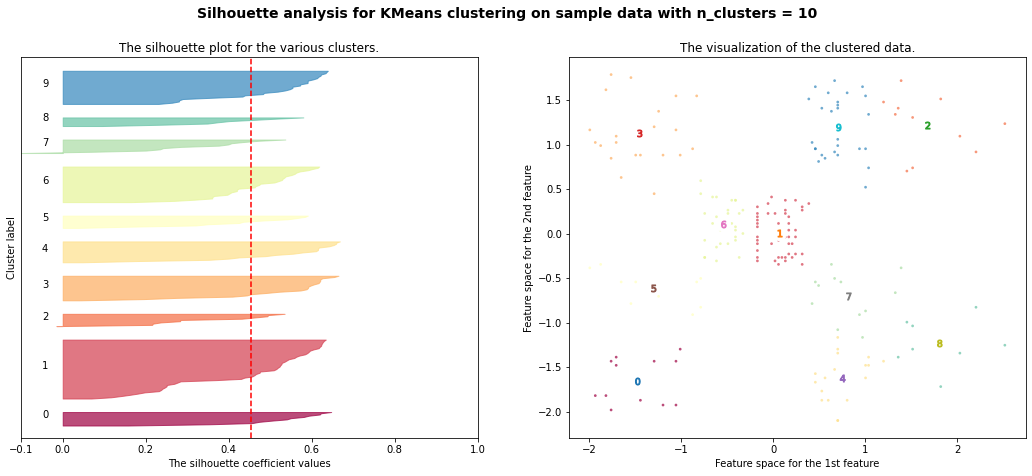

In [19]:
from __future__ import print_function
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=X_df.drop('group',axis=1).values
y=X_df['group'].values

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering 

In [21]:
model2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean',  linkage='ward')

In [22]:
model2.fit(X)

AgglomerativeClustering(n_clusters=5)

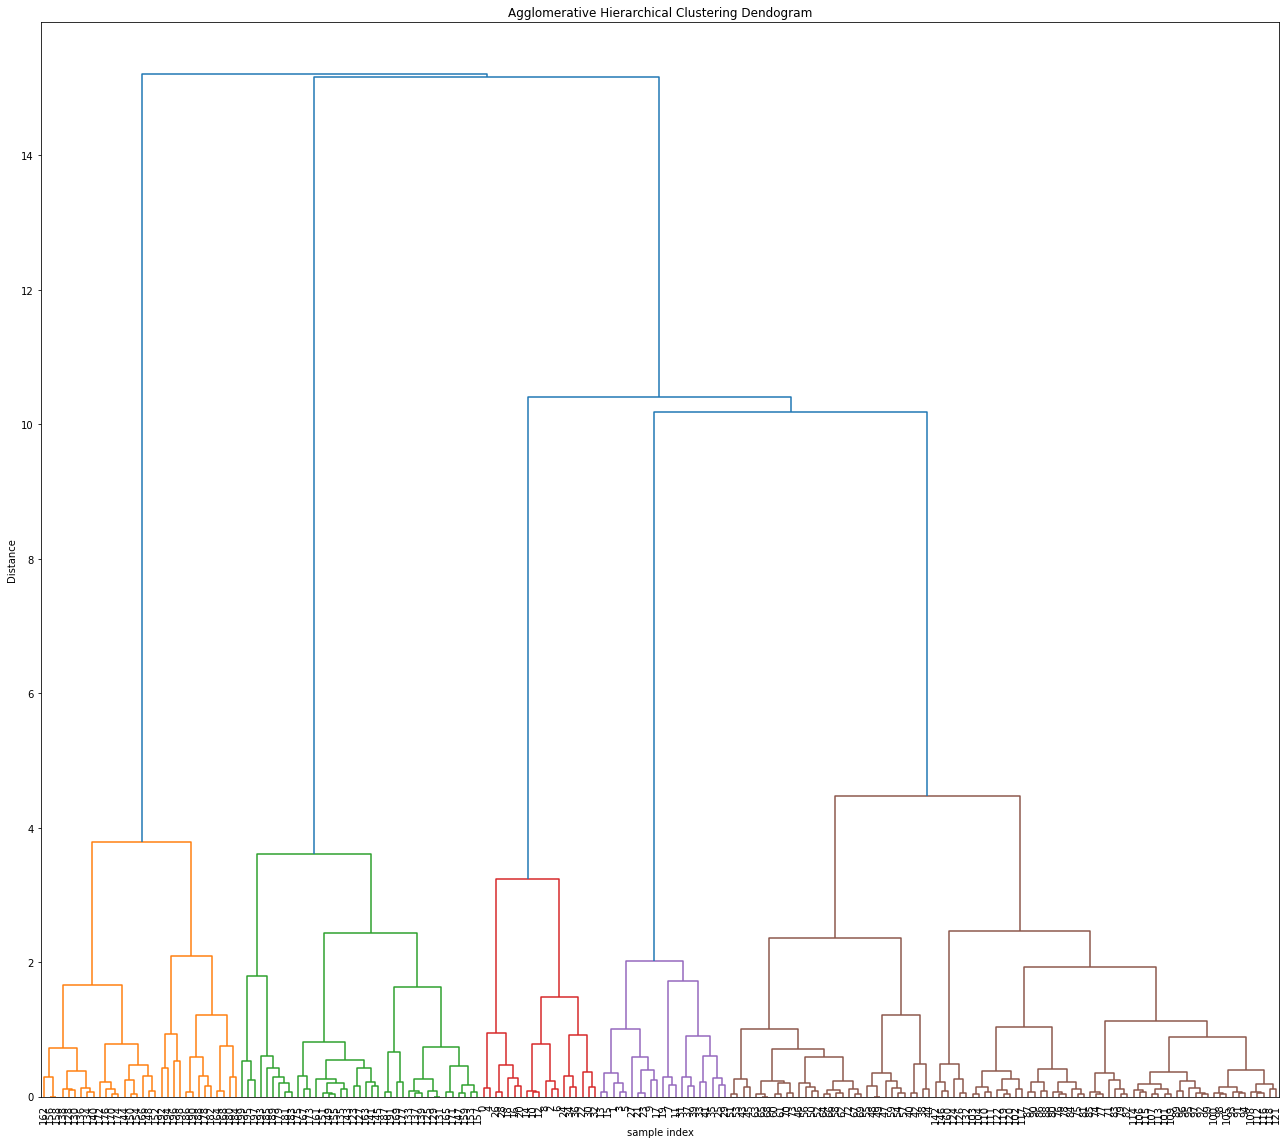

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(X, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=25,color_threshold=6,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()